<a href="https://colab.research.google.com/github/neurologic/Neurobiology-Movement/blob/main/executable/NotebookColab_CellTypes_InquiryAndAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cell Types

## The brain has thousands of different types of cells. 

Critically, different cell types serve different functions because they can perform different computations and have unique effects on circuit dynamics - why?. What makes them different? How do we even begin to tease them apart?

![](https://canvas.brown.edu/courses/851434/files/38768331/preview?verifier=D6ZNKahSL6e9e6xh4GMAfbbSJK6ynSYYQwmcKBo8)

We can define neurons by their <b>gene expression patterns</b>, <b>electrophysiology features</b>, and <b>structure</b>. Here, we'll use those three features to compare and contrast cell types in the brain.

This notebook will help us investigate specific features in the electrophysiology dataset from the Allen Brain Atlas. 

## The Allen Institute DataBase

### Targeting different cell types

How did the Allen Institute actually distinguish between different cell types? To do so, they capitalized on the fact that different cells in the brain often express different genes. With genetic engineering, we can express glowing proteins (such as green fluorescent protein) in cells that express a specific gene. This approach takes advantage of an enzyme called [Cre recombinase](https://en.wikipedia.org/wiki/Cre_recombinase), which is found in bacteriophages, but not mammals. When we artificially express Cre recombinase in a specific cell type and include LoxP sites around our glowing protein, the Cre recombinase comes and flips those LoxP sites around, leading to protein expression and a gorgeous glowing neuron. This system is called the Cre-LoxP system and is one of the main tools that neuroscientists use to identify and target specific cells in the brain. You can learn more about the Cre-LoxP system [here](https://www.jax.org/news-and-insights/2006/may/the-cre-lox-and-flp-frt-systems).

### Whole-cell patch clamp
In order to listen to neurons, the Allen researchers guided glass electrodes towards their glowing neurons under a microscope. Instead of poking into the cell to listen to it, they lowered the electrode very close the cell, and created a tiny bit of suction to break the cell membrane. As a result, the internal cell space becomes continuous with the electrode and enables really clean recordings of the cell's activity. This technique is called whole-cell patch clamp. It's a tough technique, but one that has proven irreplaceable in our understanding of how cells communicate. You can watch a virtual tour of the Allen Institute's patch clamping [here](https://www.youtube.com/watch?v=TUoCQTwewVo&feature=youtu.be).

### Characterizing the electrophysiology of cells
You'll find many different metrics which describe what happened when the Allen researchers stimulated and recorded from different cells. Let's breakdown what a few of these properties are actually measuring:
- vrest: resting membrane potential
- upstroke-downstroke: ratio of action potential upstroke to downstroke
- adaptation: the rate at which firing speeds up or slows down during a stimulus
- avg_isi (average ISI): the mean value of all interspike intervals in a sweep
- trough_v_short_square: minimum value of the membrane potential during the after-hyperpolarization in response to a short square input

If you're curious about the other metrics you see, there is a [full glossary here](https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit?usp=sharing). You can also check the [detailed Allen Institute for Brain Science Documentation](http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf).

# Manual Database exploration

Before we access the dataset programatically to perform meta-analyses in python, we’ll look at a few cells on the Allen Institute's online interface to get a feel for what the data looks like.

Make a table like the following to keep track of the information as you go:

| Property | Mouse | Human |
|:---|:---:|:---:|
| **Cre line** |  | N/A |
| **Protein coded for by Cre line gene** |  | N/A |
| **Area** |  | N/A |
| **Layer** |  |  |
| **Dendrite Type** |  |  |
| **Resting Potential** |  |  |
| **Minimum current to elicit an AP with the long square wave** |  |  |
| **Minimum current to elicit an AP with the short square wave** |  |  |
| **Adaptation Index** |  |  |

1. Go to http://celltypes.brain-map.org/. Scroll down to “Download Single Cell Data and Models” and the section “Morphology and Electrophysiology” and click on [Electrophysiology Page](http://celltypes.brain-map.org/experiment/electrophysiology/474626527). This page shows us all of the electrophysiology data for one sample cell.
2. On the top, you’ll see a Mouse Line, Brain Area, and Layer where this cell comes from. Note them in the first column of your Table.
3. Go to https://www.ncbi.nlm.nih.gov/gene/ and search for the name of the gene that was used for this cell's Cre-driver line (in other words, the cells that they targeted to get this data had that gene, and therefore they also expressed Cre-recombinase). The Mouse Line tells us the Cre-driver line that was used (without -Cre). In the first column of your table, note what the Cre-driver gene codes for.
4. This page also gives us some key details about the cell. In the first column of your table, note the cell's resting membrane potential.
5. Click through the stimulus sweeps (the colored boxes) to find the first one that elicited an action potential (make sure "*Long square*" is selected from the stimulus dropdown menu. In the first column of your table, record the minimum stimulus amplitude required to elicit an action potential in this cell. 
  > Note: You should notice that this value is either very close or identical to the rheobase of the cell, as reported on the table on the top. As a reminder, the rheobase is defined as the minimum current needed to elicit an action potential. When the current is below the rheobase, an action potential will never occur regardless of how long the stimulation is.
6. Click through to a stimulus sweep with a higher current injection. Does the cell adapt to the stimulus? In other words, does the space between spikes increase? Is there a metric here that would help quantify this? In the first column of your table, record that metric.
7. Use the stimulus dropdown menu on the left to change the stimulus type to “*Short square*” (Square simply describes the shape of the stimulus, and it's a common way to inject current into cells. There are more details on the stimuli the Allen used [here](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/stimuli.png?raw=truehttps://github.com/ajuavinett/CellTypesLesson/blob/master/docs/stimuli.png?raw=true)). Look at how the current injection trace changes -- now, it's a shorter pulse. In the first column of your table, record the minimum current needed to elicit an action potential at this stimulus.
  > "Why would a longer stimulus require less current to elicit an action potential?"
8. Use the stimulus dropdown menu on the left to change the stimulus type to “Noise.” Take a look at the current injection trace to get an idea of what this stimulus looks like. Note the differences between the cell’s response to this stimulus versus the square wave pulses. 
  > Why would you want to inject a noisy current into the cell?
9. Click on View Morphology on the right, to check out the morphology of this cell. Take note of the distribution of the axon and the dendrites. Close this window. In the first column of your table, note the dendrite type.
10. Click on Cell Feature Search on the top right corner. Here, you can look through other cells in this dataset. Find a cell from *human* tissue that is in the same Layer and has the same Dendrite Type as the first cell you looked at. Use the data on that page to fill out the second column of your table.

As you can probably appreciate at this point, pulling all of this data off of the website manually is rather tedious. If we work directly with the dataset, we can get all of these metrics and more.

# Setup

The code cell below will install packages into your coding environment -- we are *not* installing anything on your computer.

The Allen Institute has compiled a set of code and tools called a **Software Development Kit** (SDK). These tools will help us import and analyze the cell types data at the Allen Institute database. 

After you run the cell below, click the **Restart Runtime** button if it pops up, and then you're ready to proceed. 

In [1]:
#@title {display-mode: "form"}

#@markdown Run this cell to setup the notebook coding environment

# This will ensure that the AllenSDK is installed.
try:
    import allensdk
    print('allensdk imported')
except ImportError as e:
    !pip install allensdk


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import signal
from ipywidgets import widgets, interact, interactive,interactive_output
from numpy import NaN

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# !gdown 11AcCK_nCvsJay02ty3Q39oot-huCKogm
!wget -O ./manifest.json 'https://drive.google.com/uc?export=download&id=11AcCK_nCvsJay02ty3Q39oot-huCKogm'

manifest_file = './manifest.json'

#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file)

print('CellTypesCache imported.')

allensdk imported
--2023-01-21 16:01:47--  https://drive.google.com/uc?export=download&id=11AcCK_nCvsJay02ty3Q39oot-huCKogm
Resolving drive.google.com (drive.google.com)... 142.251.40.142, 2607:f8b0:4006:816::200e
Connecting to drive.google.com (drive.google.com)|142.251.40.142|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u4c53lr35mp44tf196pj0rjk9hi550hi/1674334875000/11118389411424303278/*/11AcCK_nCvsJay02ty3Q39oot-huCKogm?e=download&uuid=d79add7c-c4d1-4328-9ab3-3779a55ea1d2 [following]
--2023-01-21 16:01:48--  https://doc-0c-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u4c53lr35mp44tf196pj0rjk9hi550hi/1674334875000/11118389411424303278/*/11AcCK_nCvsJay02ty3Q39oot-huCKogm?e=download&uuid=d79add7c-c4d1-4328-9ab3-3779a55ea1d2
Resolving doc-0c-88-docs.googleusercontent.com (doc-0c-88-docs.googleusercontent.com)... 2607:f8b0:4006

<i>Note</i>: At some points throughout this notebook, you may get an `H5pyDeprecationWarning`, but don't worry about it. This is out of our control. :)

# Examine pre-computed features Across Many Cells

The Cell Types Database contains a set of electrophysiology features that have already been computed for each cell. This serves as good starting points for analysis. We can query the database to get these features.

[Here's a glossary](https://drive.google.com/file/d/1ImWFZ5CvBErp7abHAqJlw9VvNJqyVgjd/view?usp=sharing).

![](https://github.com/ajuavinett/CellTypesLesson/blob/master/docs/ap_features.png?raw=true)
<br>Image from the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Institute Cell Types Database Technical Whitepaper.</a>
<br><br>

## Compare Intrinsic Features

Different neuron types can be distinguished by specific combinations of intrinsic physiology and morphology. This section enables you to examine the relationship between pairs of intrinsic features and visualize how those features correlate with dendritic morphology. 

Cells with spiny dendrites are typically excitatory cells. Cells with aspiny dendrites are typically inhibitory cells. We can query the database for dendrite type and use that information to color a scatterplot of intrinsic physiology features.

First, examine the relationship between the speed of the action potential trough, and the ratio between the upstroke and downstroke of the action potential:
- **Action potential fast trough** (<code>fast_trough_v_long_square</code>): Minimum value of the membrane potential in the interval lasting 5 ms after the peak.
- **Upstroke/downstroke ratio** (<code>upstroke_downstroke_ratio_long_square</code>)</b>: The ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke.</div>

Select these two variables from the dropdown below after running the code cell.
  > Once you create the dropdown menu, you will not need to re-run the code cell to change your selections.

In [2]:
#@markdown Run this cell to create a queriable dataframe of 
#@markdown all the measured and calculated intrinsic features.
#@markdown > NOTE: It may take a minute or two to run.

# No need to edit below this line
################################

# Download all electrophysiology features for all cells
ephys_features = ctc.get_ephys_features()
dataframe = pd.DataFrame(ephys_features).set_index('specimen_id')

# Get information about our cells' dendrites
cells = ctc.get_cells()
full_dataframe = dataframe.join(pd.DataFrame(cells).set_index('id'))

print('Ephys features available for %d cells:' % len(full_dataframe))
# full_dataframe.head() # Just show the first 5 rows (the head) of our dataframe 

print('you can investigate the following electrophysiolgoy features:')

w_vars = widgets.SelectMultiple(
    options=list(dataframe.columns),
    rows=10,disabled=False
)
display(w_vars)
# print('Dropdowns generated at ' + str(datetime.now(timezone(-timedelta(hours=5)))))

Ephys features available for 2333 cells:
you can investigate the following electrophysiolgoy features:


SelectMultiple(options=('adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope', 'fast_trough_t_long_squa…

In [9]:
#@markdown Run this cell to create a scatterplot of the two selected parameters

'''without dendrite type
# first_selection = dataframe[w_vars.value[0]]
# second_selection = dataframe[w_vars.value[1]]

# fig = go.Figure()
# # make_subplots(rows=2,cols=1,shared_xaxes=True,
# #                     vertical_spacing=0.2)
# fig.add_trace(go.Scatter(x = first_selection, y = second_selection,
#                          opacity=0.5,
#                          line_color='black',mode='markers'))

# fig.update_layout(xaxis_title=w_vars.value[0], 
#                   yaxis_title=w_vars.value[1],
#                   width=450, height=450)
# fig.show()
'''


# Create a dataframe for spiny cells, and a dataframe for aspiny cells
spiny_df = full_dataframe[full_dataframe['dendrite_type'] == 'spiny']
aspiny_df = full_dataframe[full_dataframe['dendrite_type'] == 'aspiny']

if len(w_vars.value)==2:
    first_selection = spiny_df[w_vars.value[0]]
    second_selection = spiny_df[w_vars.value[1]]

    fig = go.Figure()
    # make_subplots(rows=2,cols=1,shared_xaxes=True,
    #                     vertical_spacing=0.2)
    first_selection = spiny_df[w_vars.value[0]]
    second_selection = spiny_df[w_vars.value[1]]
    fig.add_trace(go.Scatter(x = first_selection, y = second_selection,
                             opacity=0.5,name='spiny',
                             line_color='purple',mode='markers'))
    first_selection = aspiny_df[w_vars.value[0]]
    second_selection = aspiny_df[w_vars.value[1]]
    fig.add_trace(go.Scatter(x = first_selection, y = second_selection,
                             opacity=0.5,name='aspiny',
                             line_color='orange',mode='markers'))

    fig.update_layout(xaxis_title=w_vars.value[0], 
                      yaxis_title=w_vars.value[1],
                      width=450, height=450)
    fig.show()

    print('you plotted the following two features:')

    w_selected = widgets.Select(
        options=w_vars.value,
        disabled=False
    )
    display(w_selected)

if len(w_vars.value)!=2:
    print('Uh Oh... you must select two features from the dropdown menu before you can generate the plot.')
    
# print('Dropdowns generated at ' + str(datetime.now(timezone(-timedelta(hours=5)))))

you must select two features to plot


It looks like there may be roughly two clusters in the data when comparing the upstroke-downstroke ratio and the fast trough voltage. Do the clusters based on these two parameters relate to whether the cells are spiny or aspiny?

## Compare Action Potential Waveforms

Now take a closer look to see what these features actually mean for the action potential waveform. Choose one of the two features you just plotted from the dropdown below the figure. Hover your mouse over the plot to get the feature value for two cells (each dot in the scatter corresponds to one cell). Pick cells with values near each end of the spectrum.

In [ ]:
#@markdown Specify the parameter value for each of two cells. Then run this code cell to plot their action potential waveforms.

value_1 =  None#@param {type:"number"} 
value_2 = None #@param {type:"number"} 
cell1_id = dataframe[w_selected.value].sub(value_1).abs().idxmin()
cell2_id = dataframe[w_selected.value].sub(value_2).abs().idxmin()

win = 0.01
cell_data = ctc.get_ephys_data(cell1_id)
# spkt = cell_data.get_spike_times(rheobase_sweep_cell1)
print('Cell #1 ID with %s = %.4f is: %i' %(w_selected.value,value_1,cell1_id))
Ival = cell_data.get_sweep_metadata(dataframe.loc[cell1_id].rheobase_sweep_number)['aibs_stimulus_amplitude_pa']
print('rheobase current = %i pA' %Ival)
print('')

sweep = cell_data.get_sweep(dataframe.loc[cell1_id].rheobase_sweep_number)
spkt = cell_data.get_spike_times(dataframe.loc[cell1_id].rheobase_sweep_number)[0]
spk_1 = sweep['response'][int((spkt-win)*sweep['sampling_rate']): int((spkt+win)*sweep['sampling_rate'])]*1e3
time_1 = np.linspace(-win, win, len(spk_1))*1e3


cell_data = ctc.get_ephys_data(cell2_id)
print('Cell #2 ID with %s = %.4f is: %i' %(w_selected.value,value_2,cell2_id))
Ival = cell_data.get_sweep_metadata(dataframe.loc[cell2_id].rheobase_sweep_number)['aibs_stimulus_amplitude_pa']
print('rheobase current = %i pA' %Ival)

# spkt = cell_data.get_spike_times(rheobase_sweep_cell1)
sweep = cell_data.get_sweep(dataframe.loc[cell2_id].rheobase_sweep_number)
spkt = cell_data.get_spike_times(dataframe.loc[cell2_id].rheobase_sweep_number)[0]
spk_2 = sweep['response'][int((spkt-win)*sweep['sampling_rate']): int((spkt+win)*sweep['sampling_rate'])]*1e3
time_2 = np.linspace(-win, win, len(spk_2))*1e3

fig = make_subplots(rows=2,cols=1,shared_xaxes=True) #go.Figure()
fig.add_trace(go.Scatter(x = time_1, y = spk_1,
                         name='cell 1',
                         line_color='black',mode='lines'),row=1,col=1)
fig.add_trace(go.Scatter(x = time_2, y = spk_2,
                         name='cell 2',
                         line_color='black',mode='lines'),row=2,col=1)
fig.update_layout(yaxis_title='mV cell 1', 
                  yaxis2_title='mV cell 2',
                  xaxis2_title='time (ms)',
                  showlegend=False,
                  width=400, height=500)
fig.show()


# Create a dataframe for spiny cells, and a dataframe for aspiny cells
spiny_df = full_dataframe[full_dataframe['dendrite_type'] == 'spiny']
aspiny_df = full_dataframe[full_dataframe['dendrite_type'] == 'aspiny']

first_selection = spiny_df[w_vars.value[0]]
second_selection = spiny_df[w_vars.value[1]]

fig = go.Figure()
# make_subplots(rows=2,cols=1,shared_xaxes=True,
#                     vertical_spacing=0.2)
first_selection = spiny_df[w_vars.value[0]]
second_selection = spiny_df[w_vars.value[1]]
fig.add_trace(go.Scatter(x = first_selection, y = second_selection,
                         opacity=0.5,name='spiny',
                         line_color='purple',mode='markers'))
first_selection = aspiny_df[w_vars.value[0]]
second_selection = aspiny_df[w_vars.value[1]]
fig.add_trace(go.Scatter(x = first_selection, y = second_selection,
                         opacity=0.5,name='aspiny',
                         line_color='orange',mode='markers'))
fig.add_trace(go.Scatter(
    x = [dataframe.loc[cell1_id][w_vars.value[0]]],
    y = [dataframe.loc[cell1_id][w_vars.value[1]]],
    mode='markers',marker_symbol='x',name='cell 1',
    marker_size=10,marker_color='black'
))

fig.add_trace(go.Scatter(
    x = [dataframe.loc[cell2_id][w_vars.value[0]]],
    y = [dataframe.loc[cell2_id][w_vars.value[1]]],
    mode='markers',marker_symbol='star',name='cell 2',
    marker_size=10,marker_color='black'
))

fig.update_layout(xaxis_title=w_vars.value[0], 
                  yaxis_title=w_vars.value[1],
                  width=450, height=450)
fig.show()


A difference in even just one intrinsic neural property can mean that the action potential shape differs dramatically. 

You can explore the relationship among different parameters by changing your selections in the dropdown menu then re-running the subsequent code cells to examine the scatter and action potential plots. 


## Compare cortical layers

Different cortical layers tend to be comprised of different cell types. This may be because different layers perform different computations or functions. Can you find cortical layers that are distinct in a particular electrophysiological feature?

<!-- You might be asking yourself some questions as you examine your comparisons, such as: 

- Do differences among cortical layers in this feature correspond to differences in action potential physiology? 
- Do cells from different cortical layers differ in their action potential physiology even though they are similar in the above parameter?
- What makes more of a difference in determining a neuron's action potential physiology - the layer in which it is found or the value of a particular physiological feature?
- etc...

To answer these questions, select, from the cortical layers in the dropdown above, whichever you want to compare spike waveforms for. Then run the cell below. -->


Once you run the code cell below, choose a set of cortical layers and an intrinsic physiology feature to see the distribution of that feature within each layer. 
  > Remember that the glossary of pre-computed features can be found [here](https://docs.google.com/document/d/1YGLwkMTebwrXd_1E817LFbztMjSTCWh83Mlp3_3ZMEo/edit?usp=sharing)).

You can select specific features to compare, or you can keep changing your selection until a unique layer(s) or feature pops out at you.
  > Note that with a single layer and feature selected, you can see the cell ID that has the median feature value for that layer. 

In [59]:
#@title {display-mode: "form"}

#@markdown Run this cell to explore the variance in physiology between cortical layers. 

select_layer = widgets.SelectMultiple(
    options=full_dataframe['structure_layer_name'].unique(), # start with a single trial on a single bout... it will update when runs ; old: np.arange(len(trial_times)),
    value=[full_dataframe['structure_layer_name'].unique()[0]],
    #rows=10,
    description='Cortical Layer(s)',
    style = {'description_width': '200px'},
    disabled=False
)

select_feature = widgets.Select(
    options=list(dataframe.columns), # start with a single trial on a single bout... it will update when runs ; old: np.arange(len(trial_times)),
    value=list(dataframe.columns)[0],
    #rows=10,
    description='Feature',
    style = {'description_width': '200px'},
    disabled=False
)

median_readout = widgets.Label(
    value=f'Layer {NaN} cell ID {NaN} has a median value {NaN}'
)
median_readout.layout.width = '800px'

# iei_text = widgets.Text(
#     value='0.005',
#     placeholder='0.005',
#     description='cell data',
#     style = {'description_width': '200px'},
#     disabled=False
# )

def update_plot(layer_,feature_):
    fig, ax = plt.subplots(figsize=(10,5),num=1); #specify figure number so that it does not keep creating new ones
    
    sns.kdeplot(feature_, 
                 data = full_dataframe[full_dataframe['structure_layer_name'].isin(layer_)],
                 hue='structure_layer_name',
               warn_singular=False)
    
    
    for col in layer_:
        mask = full_dataframe['structure_layer_name']==col
        parameter_value = np.nanmedian(dataframe.loc[mask,feature_])
        cell_id = dataframe.loc[mask,w_vars_2.value].sub(parameter_value).abs().idxmin()
    # cell_data = ctc.get_ephys_data(cell_id);
        median_readout.value=f'Layer {col} cell ID {cell_id} has a median value {parameter_value}'
        # print('Layer %s cell with %s = %.4f is: %i' %(col,w_vars_2.value,parameter_value,cell_id))
    # Ival = cell_data.get_sweep_metadata(dataframe.loc[cell_id].rheobase_sweep_number)['aibs_stimulus_amplitude_pa']
    # print('rheobase current = %i pA' %Ival)
    # print('')
    
#     for col in layer_:
#         mask = full_dataframe['structure_layer_name']==col
#         ephys = dataframe.loc[mask,feature_]
#         medval = np.nanmedian(ephys)

#         ax.hist(ephys,label='layer' + col,alpha=0.5)
        
#     plt.legend()


w_cortical_layers_ = interactive(update_plot, layer_=select_layer, 
                        feature_=select_feature);
display(w_cortical_layers_,median_readout)

interactive(children=(SelectMultiple(description='Cortical Layer(s)', index=(0,), options=('3', '5', '2/3', '4…

Label(value='Layer 3 cell ID 539547437 has a median value 0.0741839770307473', layout=Layout(width='800px'))

<hr>

# That's it for today -- great work!

In [ ]:
#@markdown RUN this cell to celebrate
from IPython.display import HTML
print('Nice work!')
HTML('<img src="https://media.giphy.com/media/xUOwGhOrYP0jP6iAy4/giphy.gif">')

-----------

# Technical notes & credits

See [Technical Notes](#technical) for more information about working with the AllenSDK.

This notebook demonstrates most of the features of the AllenSDK that help manipulate data in the Cell Types Database.  The main entry point will be through the `CellTypesCache` class. `CellTypesCache` is responsible for downloading Cell Types Database data to a standard directory structure on your hard drive.  If you use this class, you will not have to keep track of where your data lives, other than a root directory.

Much more information can be found in the <a href="http://help.brain-map.org/download/attachments/8323525/CellTypes_Ephys_Overview.pdf">Allen Brain Atlas whitepaper</a> as well as in their <a href="http://alleninstitute.github.io/AllenSDK/cell_types.html">GitHub documentation</a>.

This file modified from <a href='https://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html'>this</a> notebook.

You can always Google questions you have!)

# Unused sections

## Action potential of cells from each layer

2023-01-21 16:40:05,308 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/616987833



Layer 6 cell with input_resistance_mohm = 124.7019 is: 567738879
rheobase current = 69 pA



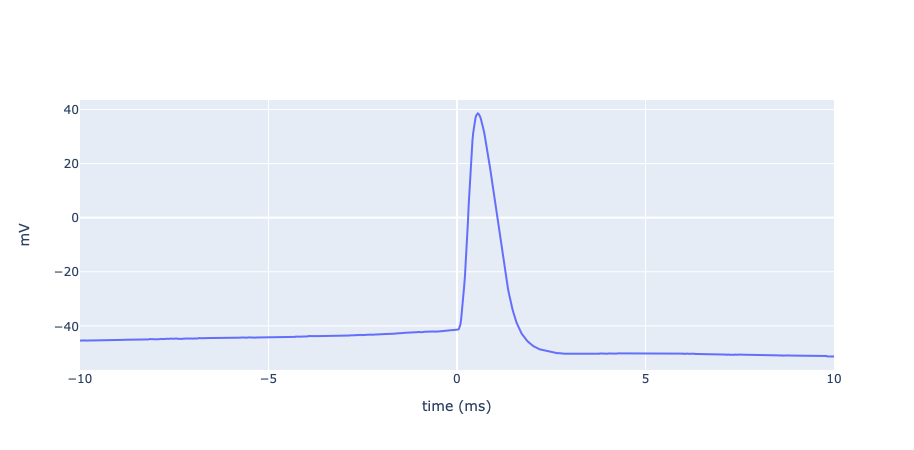

In [15]:
#@markdown Run this cell to plot the action potential 
#@markdown for a 'canonical' (median value) cell from each specified layer
#@markdown for the selected parameter.
# parameter_value =  0.08#@param {type:"number"} 
# value_2 =  1.93#@param {type:"number"} 

fig = go.Figure()
for col in w_selected_2.value:
  mask = full_dataframe['structure_layer_name']==col
  parameter_value = np.nanmedian(dataframe.loc[mask,w_vars_2.value])
  cell_id = dataframe.loc[mask,w_vars_2.value].sub(parameter_value).abs().idxmin()

  win = 0.01
  cell_data = ctc.get_ephys_data(cell_id);
  # spkt = cell_data.get_spike_times(rheobase_sweep_cell1)
  print('')
  print('Layer %s cell with %s = %.4f is: %i' %(col,w_vars_2.value,parameter_value,cell_id))
  Ival = cell_data.get_sweep_metadata(dataframe.loc[cell_id].rheobase_sweep_number)['aibs_stimulus_amplitude_pa']
  print('rheobase current = %i pA' %Ival)
  print('')

  sweep = cell_data.get_sweep(dataframe.loc[cell_id].rheobase_sweep_number)
  spkt = cell_data.get_spike_times(dataframe.loc[cell_id].rheobase_sweep_number)[0]
  spk = sweep['response'][int((spkt-win)*sweep['sampling_rate']): int((spkt+win)*sweep['sampling_rate'])]*1e3
  time = np.linspace(-win, win, len(spk))*1e3

  fig.add_trace(go.Scatter(x = time, y = spk,
                         name='layer ' + col,mode='lines'))

fig.update_layout(yaxis_title='mV', 
                  xaxis_title='time (ms)',
                  width=600, height=450)
fig.show()



## Neuron diversity among layers

Here, we are visualizing action potential physiology of the canonical (median) neuron for each layer based on a electrophysiological parameter. However, there is cell-type diversity within layers as well. You can explore this diversity extensively in an orderly and efficient manner by writing custom code to query the Allen Database. However, even without any coding experience, you can begin explore this diversity by:
1. going to the ["Cell Feature Search"](https://celltypes.brain-map.org/data) page at the Allen Institute
2. selecting specific layers and/or brain regions
3. sorting the neurons in that layer in ascending/descending order based on a specific parameter 
4. browsing the thumbnail images
5. clicking on individual thumbnails to see more detail  

## Plot individual sweeps from the website

Using this cell, you can plot specific sweeps from any cell in the database using the cell's ID (cell_id) and the number of the sweep (sweep_number). 

In [ ]:
#@markdown Enter the information needed in this form 
#@markdown and then run the code cell to plot the sweep from that neuron.
#@markdown >Note: You can change the figure size (re-run the code cell after changing)
cell_id =  None #@param {type:"number"} 
sweep_number = None #@param {type:"number"} 
figure_width = 500 #@param {type:"number"} 
figure_height = 450 #@param {type:"number"} 

cell_data = ctc.get_ephys_data(cell1_id)
sweep = cell_data.get_sweep(sweep_number)

fig = make_subplots(rows=2, cols=1, 
                    row_heights=[0.7, 0.3]
                    ,shared_xaxes=True) # go.Figure()

voltage = sweep['response']*1e3
new_fs = 5000
step = int(sweep['sampling_rate']/new_fs)
voltage_rs = voltage[0::step]
time = np.linspace(0,len(voltage)/sweep['sampling_rate'],len(voltage_rs))

fig.add_trace(go.Scatter(x = time, y = voltage_rs,
                         line_color='black',mode='lines'),
              row=1,col=1)

current = sweep['stimulus']*1e12
new_fs = 500
step = int(sweep['sampling_rate']/new_fs)
current_rs = current[0::step]
time = np.linspace(0,len(current)/sweep['sampling_rate'],len(current_rs))

fig.add_trace(go.Scatter(x = time, y = current_rs,
                         line_color='black',mode='lines'),
              row=2,col=1)

fig.update_layout(yaxis_title='mV', 
                  yaxis2_title='pA',
                  xaxis2_title='time (s)',
                  showlegend=False,
                  width=figure_width, height=figure_height)
fig.show()